## Me worrying about hyperspectral data and the geometry it has in it

In [22]:
import hyperspy.api as hs                 # hyperspectral data processing and some useful image viewing
import h5py                               # to handle .h5 files
from matplotlib import pyplot as plt      # Plotting
import numpy as np                        # Maths
import cv2                                # Image analysis
from os import walk                       # To get filepaths automatically
from natsort import natsorted             # To easily resort file order
from datetime import datetime             # For easily parsing timestamps
import warnings
warnings.filterwarnings("ignore")         # Attempt to remove some unnecessary pyplot warnings
import optical_image_functions as oif

C:\Users\es758\University of Cambridge\Alice Dearle - mini1 hyper-perov\example 2 hyperspectral\090321\\Untitled(1)(1).h5
26
560.0


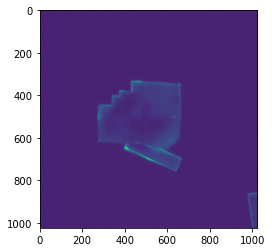

In [23]:
folder=r'C:\Users\es758\University of Cambridge\Alice Dearle - mini1 hyper-perov\example 2 hyperspectral\090321\\'
fpaths = oif.get_filepaths(folder)
fpath=fpaths[0]
print(fpath)
f = h5py.File(fpath,'r')
# Extract the image
print(len(f['Cube/Images']))
print(f['Cube/Wavelength'][-1])
image = f['Cube/Images'][24]
# Convert format for wider compatibility   
image = np.array(image).astype('float32') # converts to 2D array with float32 values
# wavelengths
#488 to 582
# 510 to 560
%matplotlib inline
plt.imshow(image)

In [ ]:
# looks like I might be able to load data more easily than I thought, at least for visualisation.
%matplotlib qt
#print(fpath)
#s = hs.load("Untitled(1)(1).hdf5")

In [27]:
s.plot()

AttributeError: 'list' object has no attribute 'plot'